## 과제1
`-` 온도구간을 10으로 변경하고 df1, df2에서 아이스크림과 소아마비의 산점도를 시각화한뒤 스크린샷 제출

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/extremum.csv')
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,146,전주,2020-01-01,-0.5,4.3,15:09,-6.4,1:42,10.7
1,146,전주,2020-01-02,1.4,6.5,14:12,-3.0,7:55,9.5
2,146,전주,2020-01-03,2.6,7.6,13:32,-0.5,23:53,8.1
3,146,전주,2020-01-04,2.0,7.7,13:51,-2.6,5:30,10.3
4,146,전주,2020-01-05,2.5,8.6,14:05,-3.2,7:36,11.8
...,...,...,...,...,...,...,...,...,...
651,146,전주,2021-10-13,19.9,25.5,14:29,15.6,3:49,9.9
652,146,전주,2021-10-14,20.4,25.5,13:36,17.0,6:15,8.5
653,146,전주,2021-10-15,18.3,22.0,13:47,15.7,4:48,6.3
654,146,전주,2021-10-16,12.8,17.4,0:01,6.5,23:31,10.9


In [4]:
## df1
temp=np.array(df.iloc[:,3])
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

In [5]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease=temp*0.5 + 40 +ϵ2

In [6]:
df1=pd.DataFrame({'temp':temp, 'icecream':icecream, 'disease':disease})
df1

,temp,icecream,disease
0,-0.5,45.243454,39.333242
1,1.4,26.682436,40.643733
2,2.6,29.918282,39.163804
3,2.0,23.270314,42.640271
4,2.5,43.654076,39.456564
...,...,...,...
651,19.9,78.839992,49.633906
652,20.4,86.554679,48.920443
653,18.3,78.666079,49.882650
654,12.8,52.771364,46.613159


(array([  3.,   9.,  29.,  60.,  92.,  86.,  65.,  93., 139.,  80.]),
 array([-12.4 ,  -8.16,  -3.92,   0.32,   4.56,   8.8 ,  13.04,  17.28,
         21.52,  25.76,  30.  ]),
 <BarContainer object of 10 artists>)

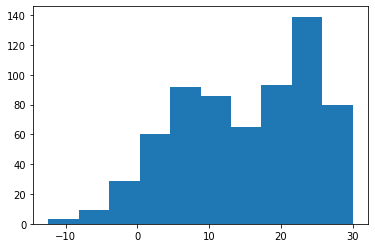

In [7]:
plt.hist(df1.temp)

In [8]:
def f(x): 
    if x<0: 
        y='group0'
    elif x<10: 
        y='group10'
    elif x<20:
        y='group20'
    else: 
        y='group30'
    return y 

In [9]:
df1['temp2']=list(map(f,df1.temp))
df1

,temp,icecream,disease,temp2
0,-0.5,45.243454,39.333242,group0
1,1.4,26.682436,40.643733,group10
2,2.6,29.918282,39.163804,group10
3,2.0,23.270314,42.640271,group10
4,2.5,43.654076,39.456564,group10
...,...,...,...,...
651,19.9,78.839992,49.633906,group20
652,20.4,86.554679,48.920443,group30
653,18.3,78.666079,49.882650,group20
654,12.8,52.771364,46.613159,group20


In [10]:
from plotnine import * 

C:\Users\HSY\.conda\envs\dv2021\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


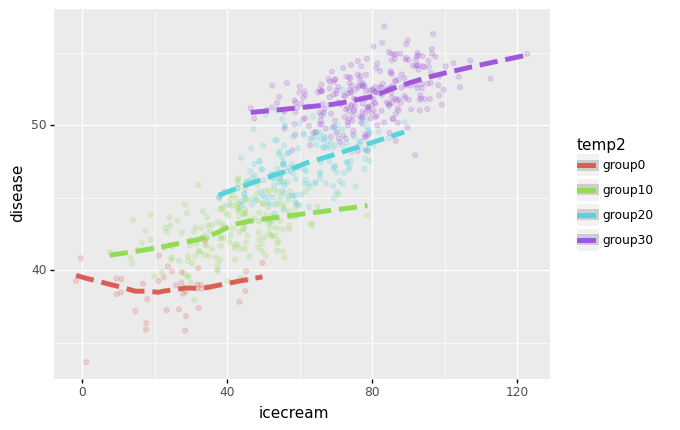

<ggplot: (142789702964)>

In [12]:
ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

In [13]:
# df2
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

In [14]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease= 30+ temp*0.0 + icecream*0.15 +ϵ2*2

In [15]:
df2=pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df2['temp2']=list(map(f,df2.temp))
df2

,temp,icecream,disease,temp2
0,-0.5,45.243454,35.953002,group0
1,1.4,26.682436,33.889832,group10
2,2.6,29.918282,30.215350,group10
3,2.0,23.270314,36.771089,group10
4,2.5,43.654076,32.961240,group10
...,...,...,...,...
651,19.9,78.839992,41.193811,group20
652,20.4,86.554679,40.424088,group30
653,18.3,78.666079,43.265212,group20
654,12.8,52.771364,38.342022,group20


C:\Users\HSY\.conda\envs\dv2021\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


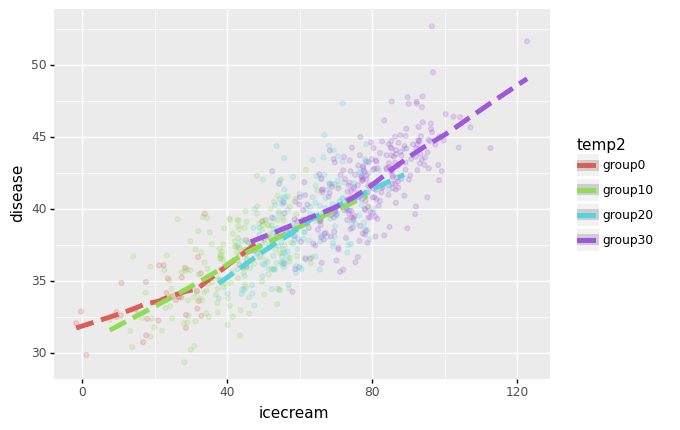

<ggplot: (142771865140)>

In [16]:
ggplot(data=df2)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')